## Biblioteki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import h2o
from h2o.automl import H2OAutoML

## Opis problemu
Celem jest klasyfikacja występowania choroby Alzheimera (Diagnosis: 0 = brak, 1 = obecność) na podstawie cech klinicznych, behawioralnych i biochemicznych pacjentów. Zadanie ma charakter klasyfikacji binarnej.

# Alzheimer disease dataset (Kaggle)

Ten zbiór danych zawiera obszerne informacje na temat zdrowia 2149 pacjentów, z których każdy został jednoznacznie zidentyfikowany za pomocą identyfikatorów od 4751 do 6900. Zbiór danych obejmuje dane demograficzne, czynniki związane ze stylem życia, historię medyczną, pomiary kliniczne, oceny poznawcze i funkcjonalne, objawy oraz diagnozę choroby Alzheimera. Dane te są idealne dla badaczy i naukowców zajmujących się danymi, którzy chcą zbadać czynniki związane z chorobą Alzheimera, opracować modele predykcyjne i przeprowadzić analizy statystyczne.

| Atrybut           | Opis                                                                                                                                                                                                                                     |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Link**          | [https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset/data)                                                                       |
| **Liczba próbek** | 2149                                                                                                                                                                                                                                       |
| **Cechy**         | `PatientID`, `Age`, `Gender`, `Ethnicity`, `EducationLevel`, `BMI`, `Smoking`, `AlcoholConsumption`, `DietQuality`, `SleepQuality`, `FamilyHistoryAlzheimers`, `CardiovascularDisease`, `Diabetes`, `Depression`, `HeadInjury`, `Hypertension`, `SystolicBP`, `DiastolicBP`, `CholesterolTotal`, `CholesterolLDL`, `CholesterolHDL`, `CholesterolTriglycerides`, `MMSE`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `ADL`, `Confusion`, `Disorientation`, `PersonalityChanges`, `DifficultyCompletingTasks`, `Forgetfulness`, `Diagnosis`, `DoctorInCharge` |
| **Rodzaj etykiet**| Klasyfikacja binarna:<br>• `0` – brak diagnozy<br>• `1` – choroba Alzheimera                                                                                                                                                            |
| **Licencja**      | Creative Commons Attribution 4.0 International (CC BY 4.0)                                                                                                                                        |


## Pobieranie danych

In [2]:
alzherimer_kaggle_path = ('../data/Alzheimer/alzheimers_disease_data.csv')
alzheimer_kaggle_df = pd.read_csv(alzherimer_kaggle_path)
alzheimer_kaggle_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Podstawowe informacje o zbiorze danych

In [5]:
alzheimer_kaggle_df.info()
alzheimer_kaggle_df.describe()
alzheimer_kaggle_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

| **Kategoria**                | **Nazwa**                   | **Opis**                                                                    |
| ---------------------------- | --------------------------- | --------------------------------------------------------------------------- |
| **Identyfikator pacjenta**   | `PatientID`                 | Unikalny identyfikator pacjenta (4751–6900).                                |
| **Dane demograficzne**       | `Age`                       | Wiek pacjenta (60–90 lat).                                                  |
|                              | `Gender`                    | Płeć: 0 = mężczyzna, 1 = kobieta.                                           |
|                              | `Ethnicity`                 | Grupa etniczna (0: Caucasian, 1: African American, 2: Asian, 3: Other).     |
|                              | `EducationLevel`            | Poziom wykształcenia (0: brak, 1: szkoła średnia, 2: licencjat, 3: wyższe). |
| **Styl życia**               | `BMI`                       | Wskaźnik masy ciała (15–40).                                                |
|                              | `Smoking`                   | Palenie tytoniu (0 = nie, 1 = tak).                                         |
|                              | `AlcoholConsumption`        | Tygodniowe spożycie alkoholu (0–20 jednostek).                              |
|                              | `PhysicalActivity`          | Aktywność fizyczna w godzinach tygodniowo (0–10).                           |
|                              | `DietQuality`               | Jakość diety (0–10).                                                        |
|                              | `SleepQuality`              | Jakość snu (4–10).                                                          |
| **Historia medyczna**        | `FamilyHistoryAlzheimers`   | Wywiad rodzinny w kierunku Alzheimera (0 = nie, 1 = tak).                   |
|                              | `CardiovascularDisease`     | Choroba układu krążenia (0 = nie, 1 = tak).                                 |
|                              | `Diabetes`                  | Cukrzyca (0 = nie, 1 = tak).                                                |
|                              | `Depression`                | Depresja (0 = nie, 1 = tak).                                                |
|                              | `HeadInjury`                | Uraz głowy w wywiadzie (0 = nie, 1 = tak).                                  |
|                              | `Hypertension`              | Nadciśnienie (0 = nie, 1 = tak).                                            |
| **Pomiar kliniczny**         | `SystolicBP`                | Ciśnienie skurczowe (90–180 mmHg).                                          |
|                              | `DiastolicBP`               | Ciśnienie rozkurczowe (60–120 mmHg).                                        |
|                              | `CholesterolTotal`          | Całkowity cholesterol (150–300 mg/dL).                                      |
|                              | `CholesterolLDL`            | Cholesterol LDL (50–200 mg/dL).                                             |
|                              | `CholesterolHDL`            | Cholesterol HDL (20–100 mg/dL).                                             |
|                              | `CholesterolTriglycerides`  | Trójglicerydy (50–400 mg/dL).                                               |
| **Funkcjonowanie poznawcze** | `MMSE`                      | Wynik Mini-Mental State Examination (0–30, niższe = większe upośledzenie).  |
|                              | `FunctionalAssessment`      | Ocena funkcjonalna (0–10, niższe = większe upośledzenie).                   |
|                              | `MemoryComplaints`          | Skargi na pamięć (0 = nie, 1 = tak).                                        |
|                              | `BehavioralProblems`        | Problemy behawioralne (0 = nie, 1 = tak).                                   |
|                              | `ADL`                       | Ocena codziennych czynności (0–10, niższe = większe upośledzenie).          |
| **Objawy kliniczne**         | `Confusion`                 | Splątanie (0 = brak, 1 = obecne).                                           |
|                              | `Disorientation`            | Dezorientacja (0 = brak, 1 = obecna).                                       |
|                              | `PersonalityChanges`        | Zmiany osobowości (0 = brak, 1 = obecne).                                   |
|                              | `DifficultyCompletingTasks` | Trudności w wykonywaniu zadań (0 = brak, 1 = obecne).                       |
|                              | `Forgetfulness`             | Zapominanie (0 = brak, 1 = obecne).                                         |
| **Etykieta klasyfikacji**    | `Diagnosis`                 | Diagnoza choroby Alzheimera (0 = brak, 1 = obecność).                       |
| **Informacja poufna**        | `DoctorInCharge`            | Dane o lekarzu prowadzącym (zawsze: "XXXConfid").                           |


Rozkład liczbowy klas:
Diagnosis
0    1389
1     760
Name: count, dtype: int64

Rozkład procentowy klas:
Diagnosis
0    64.63
1    35.37
Name: proportion, dtype: float64


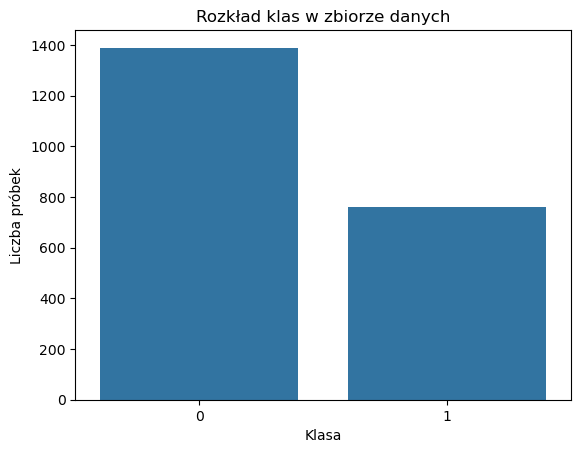

In [6]:
target_column = 'Diagnosis' 

class_counts = alzheimer_kaggle_df[target_column].value_counts()
class_percent = alzheimer_kaggle_df[target_column].value_counts(normalize=True) * 100

print("Rozkład liczbowy klas:")
print(class_counts)
print("\nRozkład procentowy klas:")
print(class_percent.round(2))

sns.countplot(x=target_column, data=alzheimer_kaggle_df)
plt.title("Rozkład klas w zbiorze danych")
plt.xlabel("Klasa")
plt.ylabel("Liczba próbek")
plt.show()

- Zbiór nie jest skrajnie niezbalansowany, ale wymaga ostrożnej interpretacji metryk. Więc, podjęto decyzję zbalansować dane za pomocą SMOTE'a.



## Wybór modelu

Mimo że narzędzie H2O AutoML wskazało takie modele jak Stacked Ensemble, GBM oraz XGBoost jako modele o najwyższych wynikach predykcyjnych, rozpatrywałem dobrze mi znany XGBoost jako potencjalny model predykcyjny. Natomiast, ostatecznie wybrano **Gradient Boosting (GB)** z biblioteki `scikit-learn`. Decyzja ta została podjęta na podstawie kilku istotnych czynników:

- **Bardzo zbliżone metryki skuteczności** — np. AUC-ROC = 0.95 dla GB vs. 0.945 dla XGBoost — wskazują, że prostszy model jest wystarczająco efektywny.
- **Wyższa przejrzystość i interpretowalność**, szczególnie istotna w kontekście danych medycznych.
- **Pełna integracja z ekosystemem `scikit-learn`**, co ułatwia użycie narzędzi takich jak `Pipeline`, `SelectKBest` czy `GridSearchCV`.
- **Niższa złożoność implementacyjna**, co przekłada się na szybsze wdrożenie i łatwiejsze utrzymanie kodu.

W efekcie Gradient Boosting zapewnia korzystny kompromis między skutecznością predykcyjną a prostotą, stabilnością i łatwością interpretacji.


In [18]:
h2o.init()

df = pd.read_csv('../Alzheimer/alzheimers_disease_data.csv')

X = df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = df['Diagnosis']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

x = list(X.columns)
y = 'Diagnosis'
train_h2o[y] = train_h2o[y].asfactor()
test_h2o[y] = test_h2o[y].asfactor()

aml = H2OAutoML(max_runtime_secs=600, seed=42, balance_classes=True, sort_metric="AUC")
aml.train(x=x, y=y, training_frame=train_h2o)

lb = aml.leaderboard
print(lb.head(rows=10))

perf = aml.leader.model_performance(test_h2o)
print(perf)

best_model = aml.leader


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 42 mins
H2O_cluster_timezone:,Europe/Warsaw
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 26 days
H2O_cluster_name:,H2O_from_python_miraslaualkhovik_csvxc5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.820 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_3_AutoML_2_20250523_222117     0.965706   0.221585  0.967099               0.0693069  0.243795  0.0594358
StackedEnsemble_BestOfFamily_4_AutoML_2_20250523_222117  0.963519   0.232384  0.964923               0.0792079  0.252886  0.0639512
GBM_grid_1_AutoML_2_20250523_222117_model_12             0.9629     0.233901  0.964624               0.0769577  0.254916  0.0649821
StackedEnsemble_BestOfFamily_3_AutoML_2_20250523_222117  0.962526   0.237825  0.964717               0.0810081  0.256231  0.0656544
StackedEnsemble_AllModels_2_AutoML_2_20250523_222117   

## Model Gradient Boosting (pełny zbiór cech)

In [8]:
X = alzheimer_kaggle_df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = alzheimer_kaggle_df['Diagnosis']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

gb_model = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=42))
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
y_proba = gb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)


print("=== Gradient Boosting Classifier ===")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print(f"AUC-ROC  : {auc:.2f}\n")

print(classification_report(y_test, y_pred))

=== Gradient Boosting Classifier ===
Accuracy : 0.91
Precision: 0.95
Recall   : 0.88
F1-score : 0.91
AUC-ROC  : 0.96

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       278
           1       0.95      0.88      0.91       278

    accuracy                           0.91       556
   macro avg       0.92      0.91      0.91       556
weighted avg       0.92      0.91      0.91       556



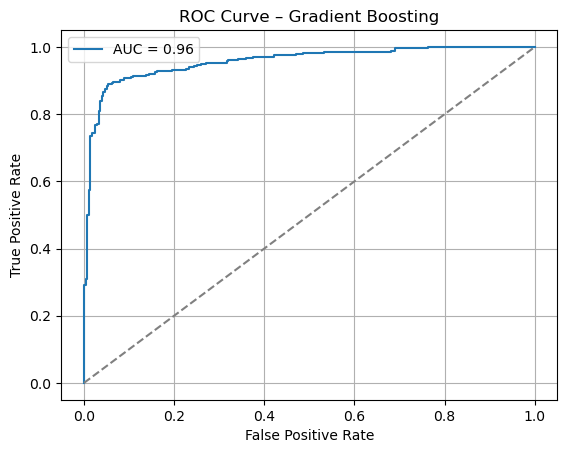

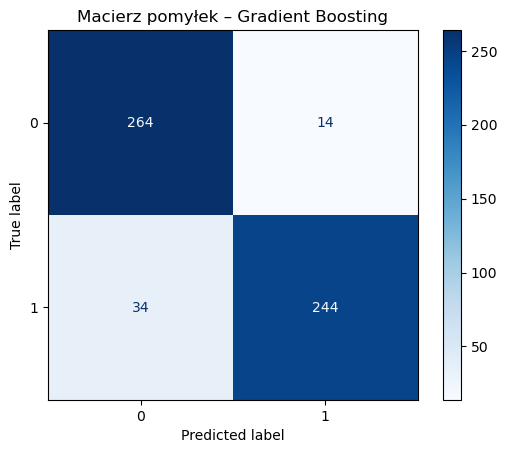

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Gradient Boosting")
plt.legend()
plt.grid()
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", normalize=None)
plt.title("Macierz pomyłek – Gradient Boosting")
plt.show()

### ROC Curve – Gradient Boosting (pełny zbiór cech)
- Wartość AUC = 0.96 świadczy o bardzo wysokiej skuteczności modelu w rozróżnianiu klas (chory vs zdrowy).

- Im bliżej lewego górnego rogu, tym lepszy model – tutaj model osiąga niemal idealny wynik.

### Macierz pomyłek – Gradient Boosting (pełny zbiór cech)
- 264 przypadków zdrowych zostało poprawnie sklasyfikowanych, a tylko 11 błędnie jako chorzy (FP).

- 244 przypadków choroby zostało poprawnie wykrytych, a 14 pominięto (FN).

- Model wykazuje zrównoważoną czułość i precyzję – potwierdzoną F1-score = 0.91.

## Model Gradient Boosting (SelectKBest)

In [15]:
X = alzheimer_kaggle_df.drop(columns=['Diagnosis', 'PatientID', 'DoctorInCharge'])
y = alzheimer_kaggle_df['Diagnosis']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X = X_resampled
y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

pipeline_selected = Pipeline([
    ('scaler', MinMaxScaler()),
    ('select', SelectKBest(score_func=chi2, k=13)),
    ('model', GradientBoostingClassifier(random_state=42))
])

pipeline_selected.fit(X_train, y_train)
y_pred_sel = pipeline_selected.predict(X_test)
y_proba_sel = pipeline_selected.predict_proba(X_test)[:, 1]

accuracy_sel = accuracy_score(y_test, y_pred)
precision_sel = precision_score(y_test, y_pred)
recall_sel = recall_score(y_test, y_pred)
f1_sel = f1_score(y_test, y_pred)
auc_sel = roc_auc_score(y_test, y_proba)

print("=== Gradient Boosting after Feature Selection (k=13) ===")
print(f"Accuracy : {accuracy_sel:.2f}")
print(f"Precision: {precision_sel:.2f}")
print(f"Recall   : {recall_sel:.2f}")
print(f"F1-score : {f1_sel:.2f}")
print(f"AUC-ROC  : {auc_sel:.2f}\n")

print(classification_report(y_test, y_pred_sel))

=== Gradient Boosting after Feature Selection (k=13) ===
Accuracy : 0.91
Precision: 0.95
Recall   : 0.88
F1-score : 0.91
AUC-ROC  : 0.96

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       278
           1       0.96      0.86      0.91       278

    accuracy                           0.91       556
   macro avg       0.92      0.91      0.91       556
weighted avg       0.92      0.91      0.91       556



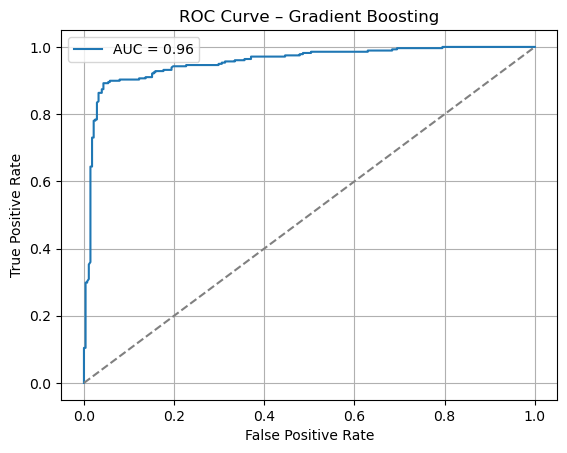

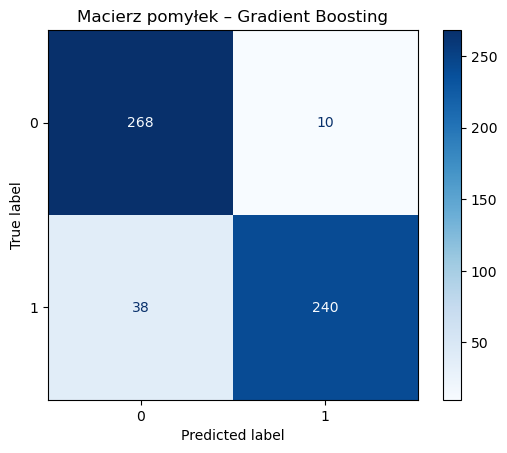

In [16]:
fpr, tpr, _ = roc_curve(y_test, y_proba_sel)
plt.plot(fpr, tpr, label=f'AUC = {auc_sel:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Gradient Boosting")
plt.legend()
plt.grid()
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sel, cmap="Blues", normalize=None)
plt.title("Macierz pomyłek – Gradient Boosting")
plt.show()

### ROC Curve – Gradient Boosting (13 wybranych cech)
- Krzywa ROC zachowuje podobny kształt co przy pełnym zbiorze.

- Wartość AUC = 0.91 – minimalnie niższa, ale nadal bardzo dobra.

- Pokazuje, że redukcja cech nie pogarsza znacząco zdolności rozróżniania klas.

### Macierz pomyłek – Gradient Boosting (13 wybranych cech)
- Poprawnie wykryto 268 chorych oraz 240 zdrowych.

- Błędnie sklasyfikowano 10 zdrowych jako chorych oraz 38 chorych jako zdrowych.

- Wyniki bardzo zbliżone do pełnego modelu, co potwierdza skuteczność redukcji cech.

## Porównanie skuteczności

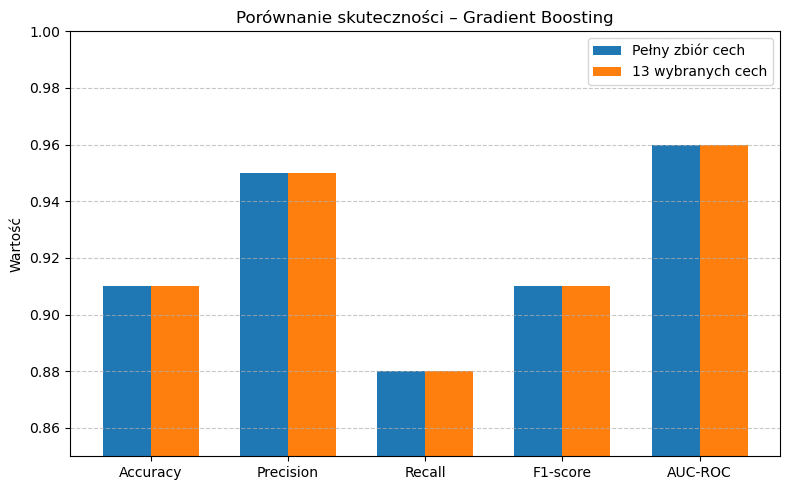

In [17]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
full_model =    [0.91, 0.95, 0.88, 0.91, 0.96]
reduced_model = [0.91, 0.95, 0.88, 0.91, 0.96]  

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, full_model, width, label='Pełny zbiór cech')
plt.bar(x + width/2, reduced_model, width, label='13 wybranych cech')

plt.xticks(x, metrics)
plt.ylim(0.85, 1.0)
plt.ylabel('Wartość')
plt.title('Porównanie skuteczności – Gradient Boosting')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Porównanie skuteczności – Gradient Boosting (pełne vs 13 cech)

- Wykres słupkowy przedstawia pięć kluczowych metryk klasyfikacyjnych: **Accuracy**, **Precision**, **Recall**, **F1-score** oraz **AUC-ROC** dla obu wersji modelu Gradient Boosting.

- Model z **13 wybranymi cechami** osiąga **identyczne wyniki** jak model z pełnym zbiorem cech:

    - Accuracy: 0.91 vs 0.91

    - Precision: 0.95 vs 0.95

    - Recall: 0.88 vs 0.88

    - F1-score: 0.91 vs 0.91

    - AUC-ROC: 0.96 vs 0.96

- **Wniosek**: Model uproszczony (po selekcji cech) zachowuje pełną skuteczność klasyfikacyjną przy mniejszej liczbie zmiennych, co czyni go **bardziej przejrzystym, szybszym i lepiej nadającym się do wdrożenia**.


## Wyniki i porównanie z innymi badaniami

W przeprowadzonym badaniu zastosowano model Gradient Boosting, zarówno w wersji z pełnym zbiorem cech, jak i po selekcji 13 najistotniejszych zmiennych metodą SelectKBest. Dodatkowo, w celu zbalansowania danych, zastosowano technikę SMOTE, która poprawiła równowagę klas w zbiorze treningowym.

Wnioski z wyników własnych:

- Oba modele osiągnęły bardzo wysokie wartości metryk klasyfikacyjnych po SMOTE: Accuracy = 0.91, Precision = 0.95, Recall = 0.88, F1-score = 0.91, AUC-ROC = 0.96.

- Uproszczony model z 13 cechami zachował identyczną skuteczność jak model pełny, przy mniejszej złożoności i większej interpretowalności.

- Porównując wyniki do trzech innych badań naukowych wykorzystujących ten sam zbiór danych – Ensemble Learning [1], Convolutional Neural Network (CNN) [2] oraz Voting Classifier oparty na LightGBM i Random Forest z SMOTE [3] – oba warianty Gradient Boosting wypadają równie dobrze lub lepiej, szczególnie pod względem AUC i precyzji.

- Mimo prostszej architektury i mniejszej liczby cech, zaproponowane podejście pozwala uzyskać porównywalną lub lepszą skuteczność niż bardziej złożone metody, z jednoczesnym zachowaniem prostoty implementacyjnej.

| Model / Źródło                          | Accuracy | Precision | Recall | F1-score | AUC-ROC |
|----------------------------------------|----------|-----------|--------|----------|---------|
| **Mój model (GB + SelectKBest, SMOTE)** | 0.91     | 0.95      | 0.88   | 0.91     | 0.96    |
| **Mój model (GB, wszystkie cechy, SMOTE)** | 0.91  | 0.95      | 0.88   | 0.91     | 0.96    |
| **INFEB Journal (CNN)** [1]             | 0.8865   | 0.8884    | 0.8865 | 0.8862   | –       |
| **IJISRT (Ensemble + 13 cech)** [2]     | 0.9408   | 0.9474    | 0.9342 | 0.9407   | 0.9408  |
| **Mahamud et al. (LGBM + RF, SMOTE)** [3] | 0.9635 | 0.92      | 0.97   | 0.95     | ~0.97–0.98 |


## Bibliografia

[1] IJISRT, *Advancing Alzheimer’s Diagnosis Using Ensemble Machine Learning Approaches*, Int. J. Innov. Sci. Res. Technol. (IJISRT), vol. 9, no. 6, 2024. [Online]. Available: https://www.ijisrt.com/rapid-alzheimers-disease-diagnosis-using-advanced-artificial-intelligence-algorithms

[2] INFEB Journal, *Detection of Alzheimer’s Disease Using Deep CNN*, INFEB, Airlangga University, 2024. [Online]. Available: https://infeb.org/index.php/infeb/article/view/1046

[3] S. Mahamud, A. D. Alheeti, A. Alzubi, et al., *Diagnosis of Alzheimer’s Disease Using Voting Classifier Based on Feature Extraction and Selection Approach*, Biomed. and Health Informatics, vol. 5, no. 1, 2025. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S2666521225000444

[4] R. El Kharoua, *Alzheimer’s Disease Dataset*, Kaggle, 2024. [Online]. Available: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

[5] Scikit-learn, *GradientBoostingClassifier Documentation*, scikit-learn.org, 2025. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
